## Preprocessing - Disparate Impact Remover -  Adult Model
- for 'sex' and 'race'

In [1]:
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), "../.."))
sys.path.insert(0, project_root)

import matplotlib.pyplot as plt

import pandas as pd
from src.data_loading import load_adult_race, load_adult_sex
from src.metrics import compute_metrics, compare_viz_metrics_2x3
from src.modeling import disparate_impact_remover_train_and_predict
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit

/opt/anaconda3/lib/python3.11/site-packages/inFairness/utils/ndcg.py:37: FutureWarning: We've integrated functorch into PyTorch. As the final step of the integration, `functorch.vmap` is deprecated as of PyTorch 2.0 and will be deleted in a future version of PyTorch >= 2.3. Please use `torch.vmap` instead; see the PyTorch 2.0 release notes and/or the `torch.func` migration guide for more details https://pytorch.org/docs/main/func.migrating.html
  vect_normalized_discounted_cumulative_gain = vmap(
/opt/anaconda3/lib/python3.11/site-packages/inFairness/utils/ndcg.py:48: FutureWarning: We've integrated functorch into PyTorch. As the final step of the integration, `functorch.vmap` is deprecated as of PyTorch 2.0 and will be deleted in a future version of PyTorch >= 2.3. Please use `torch.vmap` instead; see the PyTorch 2.0 release notes and/or the `torch.func` migration guide for more details https://pytorch.org/docs/main/func.migrating.html
  monte_carlo_vect_ndcg = vmap(vect_normalized_di

In [2]:
baseline_race_agg = pd.read_csv('../../reports/baseline_agg/adult_race_metrics_agg.csv', index_col=0)
baseline_sex_agg = pd.read_csv('../../reports/baseline_agg/adult_sex_metrics_agg.csv', index_col=0)

----------------------------------------------------------------------------------------------------

## default disparate impact remover, sex, repair 1.0

In [3]:
# 1) Load adult data
protected = 'sex'
privileged_value   = 1.0
unprivileged_value = 0.0

ds, df = load_adult_sex()   
feature_cols = [c for c in df.columns if c not in ('label', protected)]

# 2) Run Experiment and Evaluate
sss = StratifiedShuffleSplit(n_splits=25, test_size=0.2, random_state=42)
results = []

for train_idx, test_idx in sss.split(df, df['label']):
    test_df, y_t, y_pred = disparate_impact_remover_train_and_predict(
        ds=ds,
        df=df,
        train_idx=train_idx,
        test_idx=test_idx,
        protected=protected,
        repair_level=1.0,          
        pipeline=None             
)    
    m = compute_metrics(
        test_df, y_t, y_pred,
        protected, privileged_value, unprivileged_value
    )
    results.append(m)

# 3) Aggregate 
adult_sex_metrics     = pd.DataFrame(results)
adult_sex_metrics_agg = adult_sex_metrics.agg(['mean', 'std'])
print(adult_sex_metrics_agg)

      accuracy  f1_score       SPD        DI       EOD       AOD
mean  0.848685  0.641959 -0.188443  0.234589 -0.189282 -0.134782
std   0.002854  0.010948  0.017772  0.064182  0.094340  0.050608


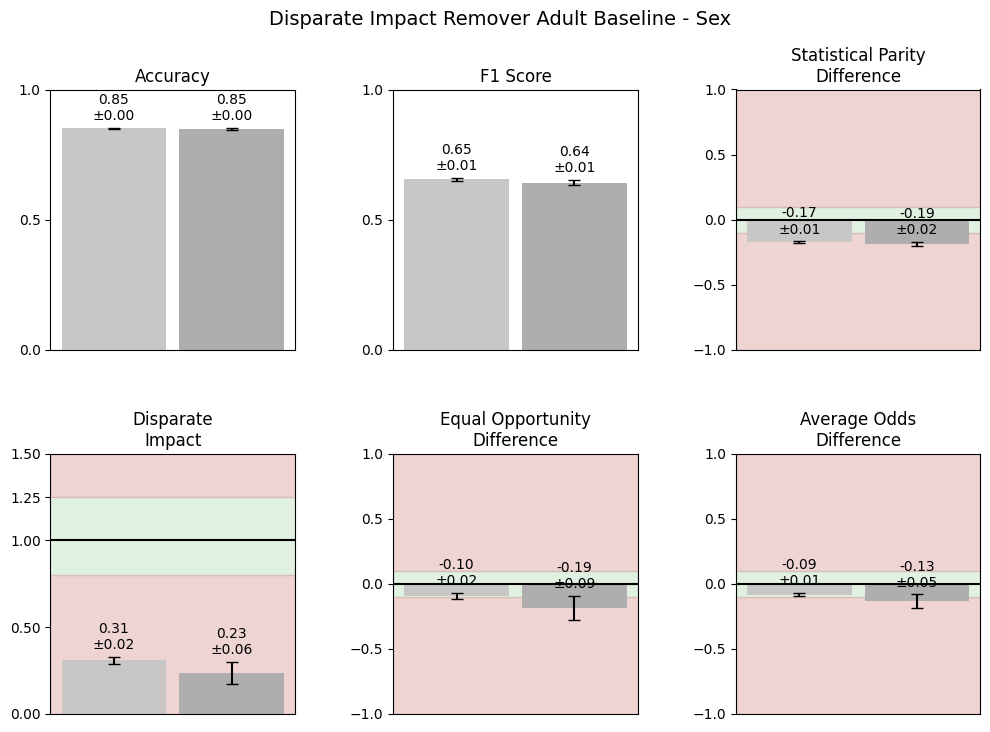

In [4]:
%matplotlib inline
compare_viz_metrics_2x3(baseline_sex_agg, adult_sex_metrics_agg, 'Baseline', 'Sex', 'Disparate Impact Remover Adult Baseline - Sex')

## default disparate impact remover, race, repair 1.0

In [5]:
# 1) Load adult data
protected = 'race'
privileged_value   = 1.0
unprivileged_value = 0.0

ds, df = load_adult_race()   
feature_cols = [c for c in df.columns if c not in ('label', protected)]

# 2) Run Experiment and Evaluate
sss = StratifiedShuffleSplit(n_splits=25, test_size=0.2, random_state=42)
results = []

for train_idx, test_idx in sss.split(df, df['label']):
    test_df, y_t, y_pred = disparate_impact_remover_train_and_predict(
        ds=ds,
        df=df,
        train_idx=train_idx,
        test_idx=test_idx,
        protected=protected,
        repair_level=1.0,          
        pipeline=None             
)    
    m = compute_metrics(
        test_df, y_t, y_pred,
        protected, privileged_value, unprivileged_value
    )
    results.append(m)

# 3) Aggregate 
adult_race_metrics     = pd.DataFrame(results)
adult_race_metrics_agg = adult_race_metrics.agg(['mean', 'std'])
print(adult_race_metrics_agg)

      accuracy  f1_score       SPD        DI       EOD       AOD
mean  0.850056  0.655512 -0.097131  0.538302 -0.086903 -0.061439
std   0.003274  0.007222  0.009280  0.029650  0.027834  0.015640


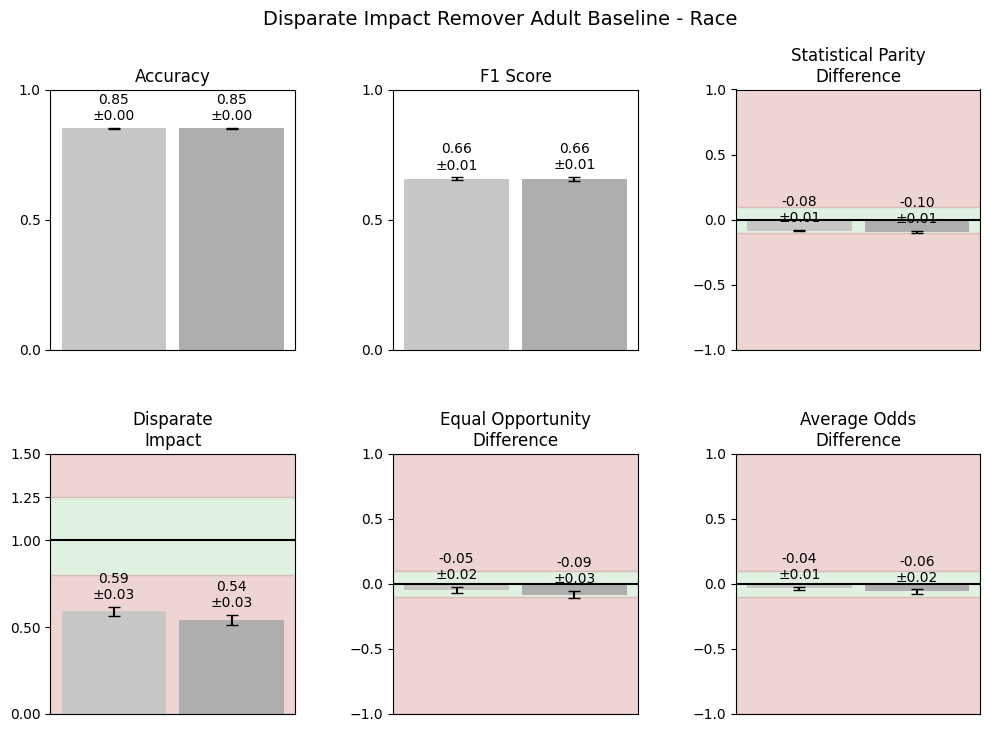

In [6]:
%matplotlib inline
compare_viz_metrics_2x3(baseline_race_agg, adult_race_metrics_agg, 'Baseline', 'Race', 'Disparate Impact Remover Adult Baseline - Race')